#1. Introduction to Linear regression

In [ ]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/통계프로그래밍/교안')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Boston.csv")
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:] #[n,1]

In [ ]:
import pandas as pd
import sklearn.linear_model as skl_lm #package한번 써보자

In [ ]:
regr = skl_lm.LinearRegression() #선형회귀함수 호출
regr.fit(X,y) #find beta by minimum Loss function y=xB + b 해서 find B와 b 

ValueError: ignored

In [ ]:
print(regr.intercept_) #b
print(regr.coef_) #B1 ~ B12, B * X라 차원이 [1,n]

[41.61727018]
[[-1.21388618e-01  4.69634633e-02  1.34676947e-02  2.83999338e+00
  -1.87580220e+01  3.65811904e+00  3.61071055e-03 -1.49075365e+00
   2.89404521e-01 -1.26819813e-02 -9.37532900e-01 -5.52019101e-01]]


In [ ]:
yhat = regr.predict(X)

In [ ]:
my_yhat = X @ regr.coef_.T + regr.intercept_
my_yhat.shape

(506, 1)

In [ ]:
((y-yhat)**2).mean() #MSE

medv    22.429681
dtype: float64

In [ ]:
import numpy as np
np.mean((np.array(y)-np.array(my_yhat))**2)

22.429681439489933

In [ ]:
((y-my_yhat)**2).mean() #MSE가 위의것과 동일할경우 잘된 yhat

medv   NaN
0      NaN
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
plt.scatterplot(y, np.array(my_yhat))
plt.plot([0,50],[0,50],color="r")

AttributeError: ignored

In [ ]:
beta_h=np.array([-1.087 * 10**(1), -6.487*10**(-1), 5.737*10**(-3),3.033*10**(-6) ]) #[4, 새로운1차원]
beta_h
int_cept = -1.087*10**(1)

In [ ]:
beta_h[:,np.newaxis]
beta_h.reshape([-1,1]) #둘다같은방법(둘다 알아야함)

array([[-1.087e+01],
       [-6.487e-01],
       [ 5.737e-03],
       [ 3.033e-06]])

In [ ]:
def sigmoid(x):
  y = 1/(1 + np.exp(-x))
  return y


In [ ]:
X = np.array([[0,729,44361], [1,817.2, 12106]])
sigmoid(X@beta_h +int_cept)

ValueError: ignored

## Exercise 1. 

중요한한!!!!!!!!!!!!!!1

You are given the following data:

In [ ]:
import numpy as np
np.random.seed(1)
X = np.random.normal(size=200)
Y = X-2*X**2 + np.random.normal(size=200)

다음 물음에 답하세요.


1.   앞의 100개를 train, 뒤의 100개를 test data로 만드세요.
2.   Create a scatter plot of X against Y using train data.
3.   다음의 모델들을 training data를 사용하여 fitting한후 test MSE가 가장 작은 모델을 고르세요.

  i. $Y=\beta_0+\beta_1X+\epsilon$

  ii. $Y=\beta_0+\beta_1X+\beta_2X^2+\epsilon$ 

  iii. $Y=\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\epsilon$ 

  ii. $Y=\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\beta_4X^4+\epsilon$ 

4. Test data 중 처음 10개를 3. 에서 고른 가장 좋은 모델로 예측한다음 실제 y값과 비교해 보세요.


In [ ]:
X.shape

(200,)

In [ ]:
#1
x_train, x_test = X[:100], X[100:] #for finding beta hat
y_train, y_test = Y[:100], Y[100:] #for testing beta hat


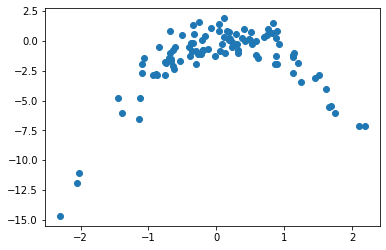

In [ ]:
#2
plt.scatter(x_train, y_train)

In [ ]:
#3 matrix =large x, vector = small x
X1_train =x_train.reshape([-1,1])
X2_train = np.stack([x_train, x_train**2], axis =1) #원리는 숙제할때만 알자
X3_train = np.stack([x_train, x_train**2, x_train**3], axis =1)
X4_train = np.stack([x_train, x_train**2, x_train**3, x_train**4], axis =1)

Y_train = y_train.reshape([-1, 1])


In [ ]:
regr1 = skl_lm.LinearRegression() #선형회귀함수 호출
regr1.fit(X1_train,Y_train)

Y_train_hat = regr1.predict(X1_train)
np.mean((Y_train - Y_train_hat)**2)


7.190179802426318

In [ ]:
regr2 = skl_lm.LinearRegression() #선형회귀함수 호출
regr2.fit(X2_train,Y_train)

Y_train_hat = regr2.predict(X2_train)
np.mean((Y_train - Y_train_hat)**2)
#이거이상함함.....

0.9259953314424707

In [ ]:
myx = np.linspace(-3, 3, num=100)
myy = regr1.predict(myx.reshape([-1,1]))
myy.shape

(100, 1)

In [ ]:
myx = np.linspce(-3,3,num=100)
myx2=np.stack([myx,myx**2], axis=1)
myy2=regr2.predict(myx2)
#1 : linear, 2: **2 > much accuracy


In [ ]:
regr4 = skl_lm.LinearRegression() #선형회귀함수 호출
regr4.fit(X4_train,Y_train)

Y4_train_hat = regr4.predict(X4_train)
np.mean(Y_train-(Y4_train_hat)**2) #MSE가 더 작아짐(정확도 올라감)


-10.452293973958268

In [ ]:
#for test data's MSE
X1_test =x_train.reshape([-1,1])
X2_test = np.stack([x_test, x_test**2], axis =1) #원리는 숙제할때만 알자
X3_test = np.stack([x_test, x_test**2, x_test**3], axis =1)
X4_test = np.stack([x_test, x_test**2, x_test**3, x_test**4], axis =1)

Y_test = y_test.reshape([-1, 1])

In [ ]:
Y_test_hat1 = regr1.predict(X1_test)
print(np.mean((Y_test - Y_test_hat1)**2)) #testMSE

7.824954706467593


In [ ]:
Y_test_hat2 = regr2.predict(X2_test)
print(np.mean((Y_test - Y_test_hat2)**2))
Y_test_hat3 = regr3.predict(X3_test)
print(np.mean((Y_test - Y_test_hat3)**2))
Y_test_hat4 = regr4.predict(X4_test)
print(np.mean((Y_test - Y_test_hat4)**2))

1.3327439629416276


NameError: ignored

#####2번째모델이이 좋다...?

# 2. Introduction to Logistic regression

Here, you'll learn all about **[pandas](https://pandas.pydata.org)**, the most popular Python library for data analysis.

In this tutorial, you will learn how to create your own data, along with how to work with data that already exists.  


In [5]:
import pandas as pd
data = pd.read_csv("Default.csv")

In [10]:
Y = data["default"]
X = data.loc[:, "student":"income"] #income 포함

In [13]:
Y=pd.get_dummies(data["default"], drop_first=True)
#Do it without using "drop_first=True"
Y.head(2) #원핫인코딩 

,Yes
0,0
1,0


In [15]:
student = pd.get_dummies(data["student"], drop_first=True)
student.head()

,Yes
0,0
1,1
2,0
3,0
4,0


In [16]:
X=pd.concat([student, data["balance"], data["income"]], axis=1)
X

,Yes,balance,income
0,0,729.526495,44361.625074
1,1,817.180407,12106.134700
2,0,1073.549164,31767.138947
3,0,529.250605,35704.493935
4,0,785.655883,38463.495879
...,...,...,...
9995,0,711.555020,52992.378914
9996,0,757.962918,19660.721768
9997,0,845.411989,58636.156984
9998,0,1569.009053,36669.112365


In [19]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.

logr = linear_model.LogisticRegression()
result = logr.fit(X,Y) #get Beta 

predicted = logr.predict(X.iloc[:, :])
print(predicted.sum())

120


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
print(logr.intercept_, logr.coef_)

[-2.9508496] [[-3.89009045e+00  4.08201022e-03 -1.33893466e-04]]


In [25]:
import numpy as np
def sigmoid(t):
  return 1/(1+np.exp(-t))

In [20]:
X.head(2)


,Yes,balance,income
0,0,729.526495,44361.625074
1,1,817.180407,12106.134700


In [26]:
sigmoid(-2.9508496-3.89009045e+00 * 0 + 4.08201022e-03 * 729.526495 - 1.33893466e-04 * 44361.625074 )

0.0026977205691806304

In [27]:
Y[:2] #정답률률 nn퍼센트

,Yes
0,0
1,0


In [28]:
predicted = logr.predict(X.iloc[:2,:1])
predicted #실패

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [34]:
(logr.predict_proba(X.iloc[:2, :])[:,1] > 0.5) *1.0 #1을 곱하면 숫자로 만들어줌

array([0., 0.])

In [44]:
Ypred = (logr.predict_proba(X.iloc[:, :])[:,1] >0.5 ) *1.0

In [47]:
np.sum(Ypred == Y.iloc[:,0])

9671

In [48]:
np.mean(Ypred == Y.iloc[:,0]) #정답률

0.9671

In [ ]:
logr.predict?

In [50]:
phat = logr.predict_proba(X)[:,1]
yhat = (phat>0.5)*1.0

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score

confusion_matrix(Y, yhat).T


array([[9609,  271],
       [  58,   62]])

In [51]:
print(Y.sum(), yhat.sum()) # true y가 0,1>1열 2열
#yhat이 0,1>1행,2행

Yes    333
dtype: int64 120.0


120.0

## Exercise: Caravam data set from ISLR2 4.7 Lab



우선 다음의 코드를 사용하여 데이터를 불러온다.

In [52]:
data = pd.read_csv("Caravan.csv")
data

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,No
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,Yes
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No


In [ ]:
data.shape

(5822, 86)

In [53]:
X = data.iloc[:, :-1]
Y = pd.get_dummies(data.iloc[:, -1], drop_first=True)

다음의 코드를 사용하여 Train과 Test 데이터셋으로 나누세요.

In [54]:
X_train = X.iloc[1000:,:]
y_train = Y.iloc[1000:]
X_test = X.iloc[:1000,:]
y_test = Y.iloc[:1000]

Logistic regression을 사용하여 다음 물음에 답하세요.


1.   Train accuracy와 Test Accuracy를 구하세요.
2.   Test data 에 대하여 Confusion matrix 를 작성하고 해석하세요.
3.   Test 데이터에서 처음 10명에 대하여 구매 확률을 계산해보고, 실제 구매여부를 잘 예측했는지 알아보세요.



In [58]:
Y = data["Purchase"]
X = data.loc["MOSTYPE":"ABYSTAND"]
Y= pd.get_dummies(data["Purchase"], drop_first=True)


In [61]:
Y.shape
X.shape

(0, 86)

In [65]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.

logr = linear_model.LogisticRegression()
logr.fit(X,y_train)


ValueError: ignored

In [66]:
predicted_purchase_train = (logr.predict_proba(X_train)[:,1]>0.5)*1.0

AttributeError: ignored

In [67]:
np.mean(y_train.iloc[:,0]==predicted_purchase_train)

NameError: ignored

In [68]:
predicted_purchase_test = (logr.predict_proba(X_test)[:,1]>0.5)*1.0
np.mean(y_test.iloc[:,0]==predicted_purchase_test)

AttributeError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score
confusion_matrix(Y, yhat).T